In [1]:
import psycopg2
import pandas as pd
from math import log

In [2]:
with psycopg2.connect(dbname="recomendaciones-steam", user="postgres", password="postgres") as conn:
    cur = conn.cursor()
    cur.execute("select item_id, avg(playtime) as average from playtime  group by item_id order by average desc;")

Analisis de datos de la Tabla 'playtime'

In [3]:
data = [(item, float(playtime)) for (item, playtime) in cur.fetchall()]
df = pd.DataFrame(data, columns=['item_id', 'avg_playtime'])

array([[<Axes: title={'center': 'avg_playtime'}>]], dtype=object)

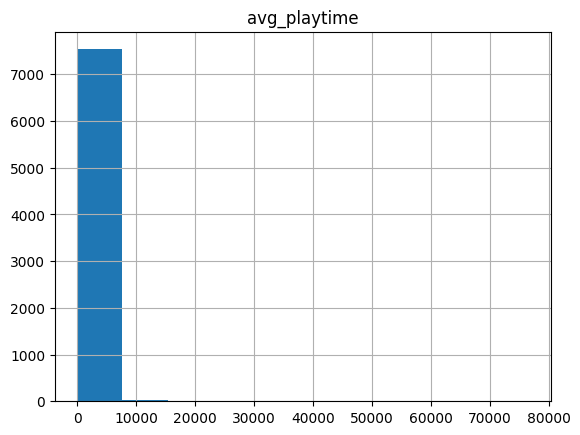

In [5]:
# Observamos la distribucion del promedio de horas jugadas

df.hist(column='avg_playtime')

In [7]:
df['log_avg_playtime'] = df.apply(lambda f: log(f['avg_playtime']), axis=1)

array([[<Axes: title={'center': 'log_avg_playtime'}>]], dtype=object)

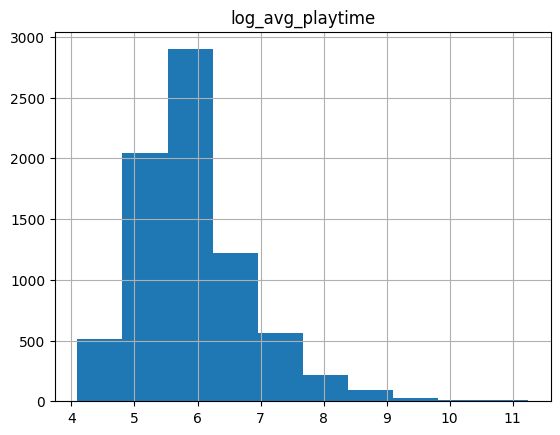

In [8]:
#Obsrvamos que los datos estan fuertemente concentrados en los primeros valores, lo que tiene sentido, ya que es muy comun que las personas instalen
# juegos y que luego no los jueguen o que solo los prueben.
# Aplicamos el logaritmo del promedio de horas jugadas para ver si modificando la escala, encontramos una distribucion mas similar a la normal

df.hist(column='log_avg_playtime')

array([[<Axes: title={'center': 'log_avg_playtime'}>]], dtype=object)

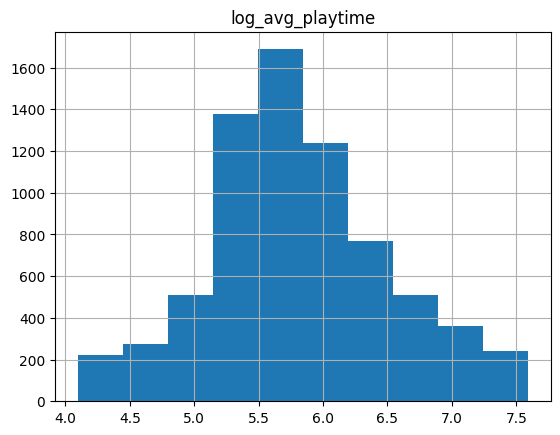

In [9]:
# Colocamos una cota superior, dado que consideramos que podriamos agrupar los valores superiores dentro de ese limite, para poder tener una distribucion mas uniforme.
df.where(lambda f: f['avg_playtime'] < 2000).hist(column='log_avg_playtime')

<Axes: >

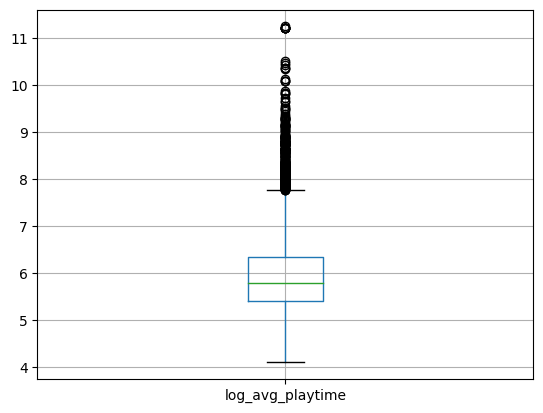

In [10]:
# En el boxpot tambien se observa presencia de outliers en el logaritmo del promedio de las horas jugadas
df.boxplot(column='log_avg_playtime')

<Axes: >

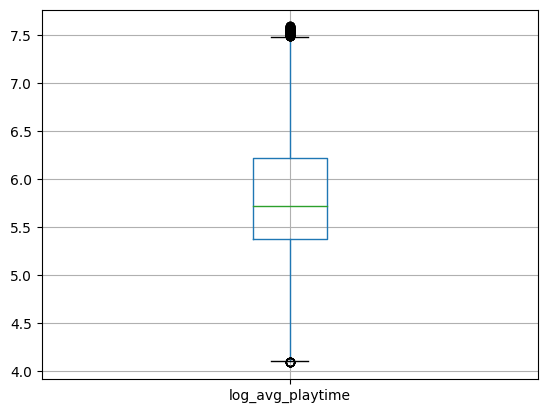

In [11]:
# Pero aplicando la cota superior, los outliers disminuyen significativamente.
df.where(lambda f: f['avg_playtime'] < 2000).boxplot(column='log_avg_playtime')

In [ ]:
# Este analisis podria continuarse definiendo categorias de horas jugadas a partir de clusterizacion, de forma que podamos clasificar los juegos en 
# grupos de horas jugadas siendo estos un indicador de la duracion del juego. Para esta etapa, si tendremos en cuenta que aplicando el logaritmo del promedio y una cota
# superior ayudan a que las horas jugadas tengan una distribucion mas uniforme, y por lo tanto, sea mas fiable a la hora de normalizar para poder utilizar
# el modelo de similitud del coseno.